In [1]:
import os, re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('아파트(매매)__실거래가_20220808114117.csv', encoding='cp949', engine='python')
df.가격 = df.가격.str.replace(',', '').astype('int64')

df

,지역,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,강원도 강릉시 견소동,202,202,0,송정한신,43.3800,202207,11,16000,9,1997,경강로2539번길 8,NaN,중개거래,강원 강릉시
1,강원도 강릉시 견소동,202,202,0,송정한신,59.8000,202207,14,22900,12,1997,경강로2539번길 8,NaN,중개거래,강원 강릉시
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,202207,19,33500,3,2005,경강로2539번길 22,NaN,중개거래,강원 강릉시
3,강원도 강릉시 교동,1767,1767,0,교동2현대,84.9700,202207,6,46700,14,1999,교동광장로 138-15,NaN,중개거래,강원 강릉시
4,강원도 강릉시 교동,1766,1766,0,교동3주공,59.7400,202207,2,32000,11,2002,교동광장로 138-12,NaN,중개거래,강원 강릉시
5,강원도 강릉시 교동,357,357,0,교동이-편한세상,123.7566,202207,18,55500,4,2006,종합운동장길 92,NaN,중개거래,강원 강릉시
6,강원도 강릉시 교동,1780,1780,0,부영3차,84.9300,202207,12,35000,5,2001,하슬라로 124,NaN,직거래,-
7,강원도 강릉시 교동,1780,1780,0,부영3차,84.9300,202207,26,28000,5,2001,하슬라로 124,NaN,직거래,-
8,강원도 강릉시 교동,1762,1762,0,부영5,84.9300,202207,2,42500,5,2001,교동광장로 163,NaN,중개거래,강원 강릉시
9,강원도 강릉시 교동,1775,1775,0,부영6,84.9763,202207,28,44000,9,2003,정원로 53-9,NaN,중개거래,강원 강릉시


In [2]:
gs = df[df.지역.str.find('군산') > -1]
gs_mean=gs.mean()
gs_mean

부번         3.840376e+00
면적         6.445493e+01
계약년월       2.022070e+05
계약일        1.306573e+01
가격         1.076136e+04
층          7.849765e+00
건축년도       1.998521e+03
해제사유발생일    2.022073e+07
dtype: float64

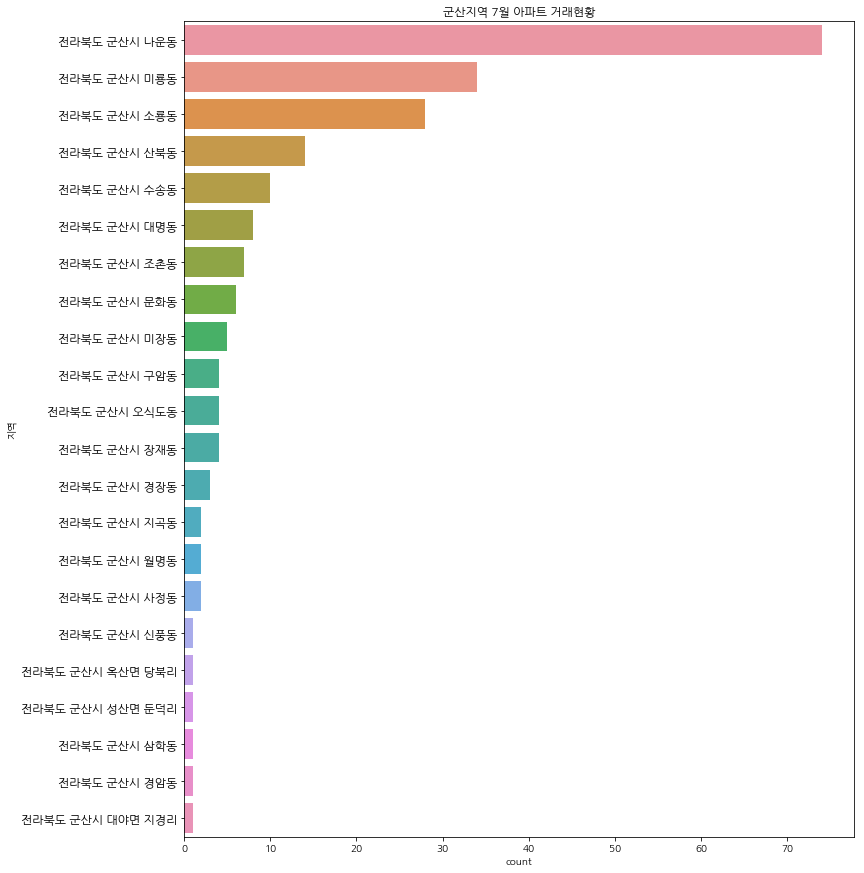

In [3]:
plt.figure(figsize=(12, 15))
sns.countplot(y=gs['지역'], order=gs['지역'].value_counts().index)
plt.yticks(fontsize=12)
plt.title('군산지역 7월 아파트 거래현황')
plt.show()

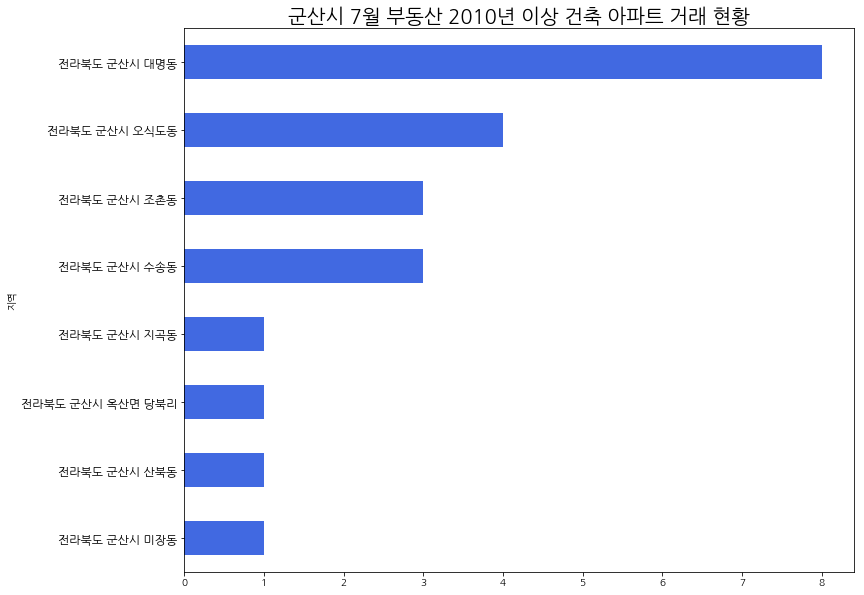

In [4]:
plt.figure(figsize=(12, 10))
gs.loc[gs['건축년도']> 2010].groupby('지역')['건축년도'].count().sort_values().plot(kind='barh', color='royalblue')
plt.yticks(fontsize=12)
plt.title('군산시 7월 부동산 2010년 이상 건축 아파트 거래 현황', fontsize=20)
plt.show()

In [5]:
import os, re
import numpy as np
import pandas as pd
df = pd.read_csv('jb_202207.csv', encoding='cp949')

df

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,전라북도 군산시 경암동,539-9,539,9,새한,59.2500,202207,16,"7,400",3,1995,경촌3길 23,NaN,중개거래,전북 군산시
1,전라북도 군산시 경장동,511-6,511,6,오르빌,59.9800,202207,4,"10,200",9,2004,번영로 86,NaN,중개거래,전북 군산시
2,전라북도 군산시 경장동,511-6,511,6,오르빌,59.9800,202207,4,"9,200",2,2004,번영로 86,NaN,직거래,-
3,전라북도 군산시 경장동,511-6,511,6,오르빌,59.9800,202207,19,"10,800",13,2004,번영로 86,NaN,중개거래,전북 군산시
4,전라북도 군산시 구암동,65,65,0,현대,59.9000,202207,4,"8,000",8,1994,서당길 11,NaN,중개거래,전북 군산시
5,전라북도 군산시 구암동,65,65,0,현대,84.9000,202207,7,"13,500",7,1994,서당길 11,NaN,중개거래,전북 군산시
6,전라북도 군산시 구암동,65,65,0,현대,84.9000,202207,19,"14,300",7,1994,서당길 11,NaN,중개거래,전북 군산시
7,전라북도 군산시 구암동,65,65,0,현대,59.9000,202207,20,"8,600",13,1994,서당길 11,NaN,직거래,-
8,전라북도 군산시 나운동,787-4,787,4,금호1차,58.9500,202207,15,"3,300",4,1987,신설3길 14,NaN,직거래,-
9,전라북도 군산시 나운동,92,92,0,금호타운아파트,59.8800,202207,20,"9,000",7,1994,수송로 71,NaN,중개거래,전북 군산시


In [6]:
pd.Series(df.columns)

0          시군구
1           번지
2           본번
3           부번
4          단지명
5      전용면적(㎡)
6         계약년월
7          계약일
8     거래금액(만원)
9            층
10        건축년도
11         도로명
12     해제사유발생일
13        거래유형
14      중개사소재지
dtype: object

In [7]:
sub_df = df.loc[df['시군구'].isin(['전라북도 군산시 수송동'])]
sub_df[:1]

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
182,전라북도 군산시 수송동,904,904,0,동신,59.49,202207,1,"6,750",11,1991,축동로 10,NaN,중개거래,전북 군산시


In [8]:
jb = pd.read_csv('jb_202206.csv', encoding='utf-8')
jb = jb[['시군구명', '상권업종대분류명', '상권업종중분류명', '위도', '경도']]
jb

,시군구명,상권업종대분류명,상권업종중분류명,위도,경도
0,김제시,생활서비스,이/미용/건강,35.892901,126.911612
1,익산시,소매,가정/주방/인테리어,35.944067,126.934829
2,남원시,숙박,호텔/콘도,35.406587,127.389987
3,완주군,음식,한식,35.908428,127.065548
4,전주시 완산구,음식,한식,35.789700,127.113113
5,부안군,소매,화장품소매,35.726688,126.731677
6,전주시 덕진구,음식,유흥주점,35.853740,127.154682
7,군산시,음식,유흥주점,35.969105,126.678375
8,임실군,음식,한식,35.607920,127.280881
9,익산시,생활서비스,대중목욕탕/휴게,35.998730,126.945108


In [9]:
jb_gs = jb.loc[jb['상권업종중분류명'] == '부동산중개']
jb_gs

,시군구명,상권업종대분류명,상권업종중분류명,위도,경도
55,군산시,부동산,부동산중개,35.971233,126.733653
83,전주시 완산구,부동산,부동산중개,35.787127,127.134901
113,익산시,부동산,부동산중개,35.943652,126.942926
132,전주시 덕진구,부동산,부동산중개,35.837675,127.131463
167,전주시 덕진구,부동산,부동산중개,35.874174,127.070745
306,전주시 완산구,부동산,부동산중개,35.836019,127.109576
312,전주시 덕진구,부동산,부동산중개,35.834138,127.142150
383,전주시 덕진구,부동산,부동산중개,35.843319,127.097396
398,군산시,부동산,부동산중개,35.956397,126.708993
418,완주군,부동산,부동산중개,35.938107,127.160578


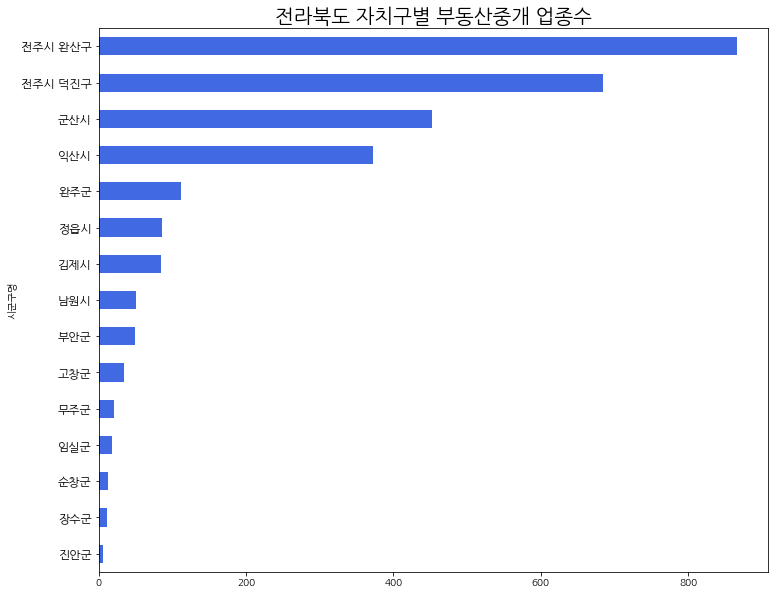

In [10]:
plt.figure(figsize=(12, 10))
jb.loc[jb['상권업종중분류명'] == '부동산중개'].groupby('시군구명')['상권업종대분류명'].count().sort_values().plot(kind='barh', color='royalblue')
plt.yticks(fontsize=12)
plt.title('전라북도 자치구별 부동산중개 업종수', fontsize=20)
plt.show()

In [11]:
#sub_df[['위도', '경도', '상권업종중분류명']]

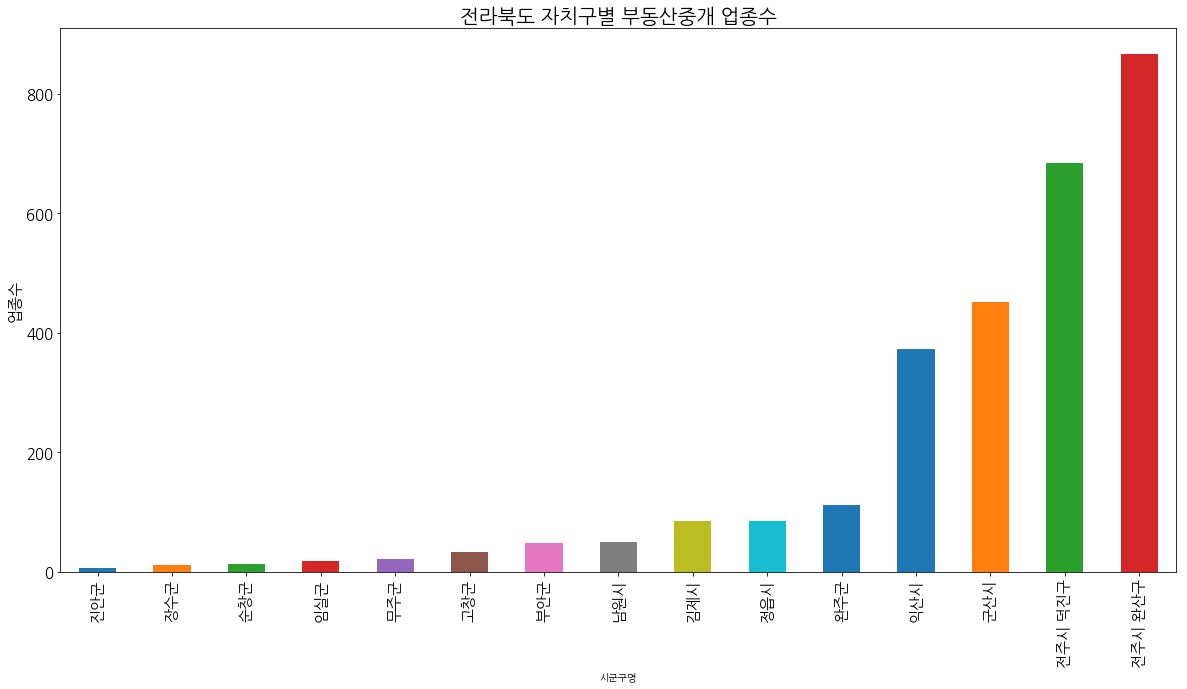

In [12]:
plt.figure(figsize=(20,10))
plt.title('전라북도 자치구별 부동산중개 업종수', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("업종수", fontsize=15)
jb.loc[jb['상권업종중분류명'] == '부동산중개'].groupby('시군구명')['상권업종대분류명'].count().sort_values().plot(kind=('bar'))
plt.show()

In [13]:
jb_group_data = jb.loc[jb['상권업종중분류명'] == '부동산중개'].groupby('시군구명')['상권업종중분류명'].count() 
jb_group_data

시군구명
고창군         34
군산시        452
김제시         85
남원시         50
무주군         21
부안군         49
순창군         13
완주군        112
익산시        373
임실군         18
장수군         11
전주시 덕진구    685
전주시 완산구    866
정읍시         86
진안군          6
Name: 상권업종중분류명, dtype: int64

In [14]:
import folium 
latitude = 35.964762804542666
longitude = 126.72008968841902
m = folium.Map(location=[latitude, longitude], 
    zoom_start=17, 
    width=750, 
    height=500
    )

In [15]:
# request -> json -> pandas -> matplotlib -> folium

import requests
import json
r = requests.get('https://raw.githubusercontent.com/keysam1004/test/main/jb_gu.json')
c = r.content

# 좌표 추출
jb_geo = json.loads(c)
jb_geo

{'type': 'FeatureCollection',
 'name': 'temp',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID': 2221,
    'adm_nm': '전라북도 전주시완산구 동서학동',
    'adm_cd': '3501160',
    'adm_cd2': '4511165000',
    'sgg': '45111',
    'sido': '45',
    'sidonm': '전라북도',
    'sggnm': '전주시완산구'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[127.21727554950114, 35.801637184246545],
       [127.2174059854168, 35.80111377543631],
       [127.21741194008415, 35.80104869240642],
       [127.217353259816, 35.80091617308447],
       [127.21573979785539, 35.79854253139026],
       [127.21227375994665, 35.79432917146289],
       [127.21212288129284, 35.794156774582575],
       [127.21201818510175, 35.79403936173142],
       [127.21193512787083, 35.79396944487121],
       [127.21184289636162, 35.79391705603536],
       [127.21167386266492, 35.79384232473018],
       [127.21099787217096, 35.7935933617526

In [27]:
m = folium.Map(
    location=[ 35.964762804542666, 126.72008968841902], 
    zoom_start=11, 
    tiles='cartodbpositron' 
)
folium.GeoJson( 
    jb_geo, 
    name='지역구'
).add_to(m)

m.choropleth(geo_data=jb_geo, 
    data=jb_group_data, 
    fill_color='PRGn',
    fill_opacity=0.5,
    line_opacity=0.2,
    key_on='properties.sggnm',
    legend_name="지역구별 부동산 업종 수" 
    )
#m
m.save('부동산업종수.html')

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
